<a href="https://colab.research.google.com/github/jmendozaore/Area51-Lecturas/blob/master/Copia_de_Clase_modelo_lineal_manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np


https://www.dataquest.io/blog/sci-kit-learn-tutorial/

https://scikit-learn.org/stable/tutorial/basic/tutorial.html

XG Boost

In [0]:
vehiculos=pd.read_csv("vehiculos_procesado.csv", usecols=["consumo","co2","cilindros","desplazamiento"])

In [0]:
litros_por_galon=3.78541
vehiculos["consumo_litros_milla"] = litros_por_galon / vehiculos.consumo

No lee Archivo desde URL, requeires una libreria para leer csv desde un URL

In [0]:
vehiculos.shape

(35539, 5)

In [0]:
vehiculos.head()

,desplazamiento,cilindros,consumo,co2,consumo_litros_milla
0,2.5,4.0,17,522.764706,0.222671
1,4.2,6.0,13,683.615385,0.291185
2,2.5,4.0,16,555.437500,0.236588
3,4.2,6.0,13,683.615385,0.291185
4,3.8,6.0,16,555.437500,0.236588


In [0]:
pct_entrenamiento=0.8

In [0]:
vehiculos_training=vehiculos.sample(frac=pct_entrenamiento)
vehiculos_training.shape

(28431, 5)

In [0]:
vehiculos_test=vehiculos[~vehiculos.index.isin(vehiculos_training.index)]

In [0]:
vehiculos_test.shape # Permite lista los archivos en columnas y filas

(7108, 5)

In [0]:
variables_independientes= ["consumo_litros_milla","cilindros","desplazamiento"]
variables_dependientes="co2"

In [0]:
X= vehiculos_training[variables_independientes].as_matrix()
Y = vehiculos_training[variables_dependientes].as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
X_T=X.T # Mutiplica por la transpuesta
X


array([[0.18025762, 4.        , 2.5       ],
       [0.17206409, 4.        , 2.        ],
       [0.27038643, 8.        , 5.        ],
       ...,
       [0.22267118, 8.        , 5.3       ],
       [0.1514164 , 4.        , 1.6       ],
       [0.21030056, 8.        , 4.5       ]])

In [0]:
Y

array([423.19047619, 403.95454545, 634.78571429, ..., 522.76470588,
       355.48      , 493.72222222])

In [0]:
betas=np.linalg.inv(X_T @ X) @ X_T @ Y # Formula de Betas
betas

array([ 2.30489108e+03, -5.39586764e-01,  3.74129303e+00])

In [0]:
alfa=Y.mean() - np.dot(betas, vehiculos_training[variables_independientes].mean().as_matrix())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
alfa

0.3627469056549444

In [0]:
def predecir(r):
  return alfa + np.dot(betas, r.values)

In [0]:
vehiculos_training['co2_pred']=vehiculos_training[variables_independientes].apply(predecir, axis=1)

In [0]:
vehiculos_test['co2_pred']=vehiculos_test[variables_independientes].apply(predecir, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
vehiculos_training.head()

,desplazamiento,cilindros,consumo,co2,consumo_litros_milla,co2_pred
27502,2.5,4.0,21,423.190476,0.180258,423.031811
20364,2.0,4.0,22,403.954545,0.172064,402.275974
14132,5.0,8.0,14,634.785714,0.270386,637.963785
29857,5.4,8.0,12,740.583333,0.315451,743.328847
28685,2.2,4.0,26,341.807692,0.145593,342.010542


In [0]:
vehiculos_test.head()

,desplazamiento,cilindros,consumo,co2,consumo_litros_milla,co2_pred
1,4.2,6.0,13,683.615385,0.291185,683.989252
5,2.2,4.0,22,403.954545,0.172064,403.024233
6,2.2,4.0,24,370.291667,0.157725,369.975150
7,3.0,6.0,20,444.350000,0.189271,444.596992
9,2.3,4.0,24,370.291667,0.157725,370.349280


In [0]:
modelo_formula="y ~ {alfa:.3f} +{beta_1:2f}*desplazamiento + {beta_2:.2f}*cilindros + {beta_3:.3f}*consumo_litros_milla".format(alfa=alfa, beta_1=betas[0],beta_2=betas[1], beta_3=betas[2])

In [0]:
modelo_formula

'y ~ 0.363 +2304.891079*desplazamiento + -0.54*cilindros + 3.741*consumo_litros_milla'

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size']=16

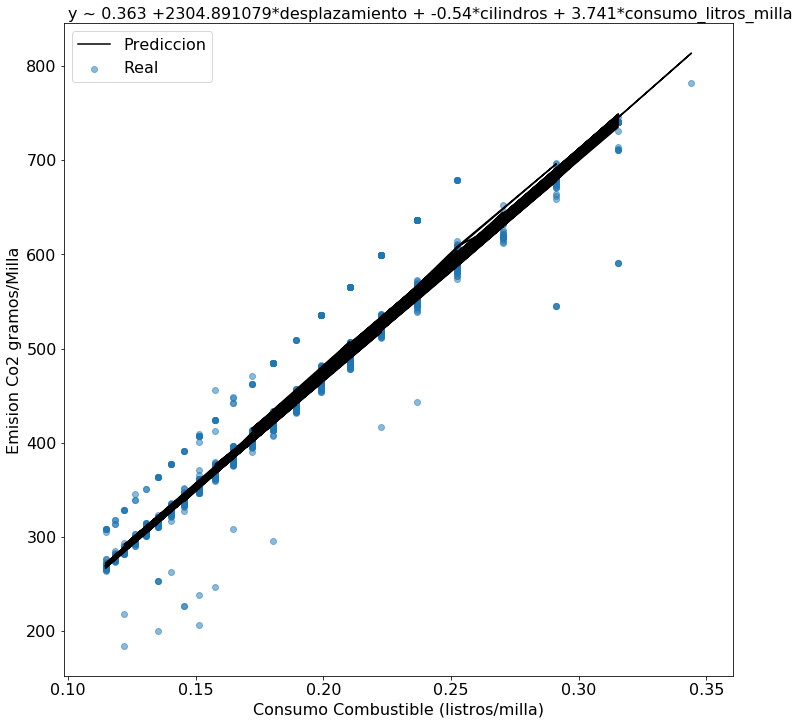

In [0]:
plt.scatter(vehiculos_test.consumo_litros_milla,vehiculos_test.co2, alpha=0.5, label="Real")
plt.text(0.1,850, modelo_formula)
plt.plot(vehiculos_test.consumo_litros_milla,vehiculos_test.co2_pred, c="black", label="Prediccion")
plt.xlabel("Consumo Combustible (listros/milla)")
plt.ylabel("Emision Co2 gramos/Milla")
plt.legend();

In [0]:
def error_cuadratico_medio(y, y_pred):
  return np.sum(y-y_pred)**2/len(y)

In [0]:
error_training= error_cuadratico_medio(vehiculos_training[vehiculos_training.co2,vehiculos_training.co2_pred])


TypeError: ignored

In [0]:
error_test=error_cuadratico_medio(vehiculos_test.co2,vehiculos_test.co2_pred)
error_test

204.41148528062683